# UD1 Randomized Algorithms and Concentration Inequalities  
**Course:** Quantum Machine Learning and Quantumn computers (UIMP 2025-2026 course)

**Name:** Ferrán Mata Infante

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, beta

First, we will select the parameters of the distributions to be used. We will study the Gaussian distribution with σ greater and smaller than 1, as well as the uniform and beta distributions

In [182]:
# Gaussian distribution 1
mu_gaussian_1 = 2 #Mean value
sigma_gaussian_1 = 1.5 #Sigma

# Gaussian distribution 2
mu_gaussian_2 = 2 #Mean value
sigma_gaussian_2 = 0.5 #Sigma

# Uniform distribution
a_uniform=0
b_uniform=1

# Beta distribution
alpha_beta, beta_beta= 3,5


Now, let us generate random data from these distributions, using an arbitrary sample size 
𝑁. This choice aligns with the objective of the first problem, which is to achieve a low estimation error. We will then plot the resulting data alongside the theoretical distribution functions.



In [183]:
# Number of data
N = 1000   

data_gaussian_1 =np.random.normal(mu_gaussian_1, sigma_gaussian_1, N)
data_gaussian_2 =np.random.normal(mu_gaussian_2, sigma_gaussian_2, N)

data_uniform = np.random.uniform(low=a_uniform, high=b_uniform, size=N)

data_beta = np.random.beta(alpha_beta, beta_beta, N)

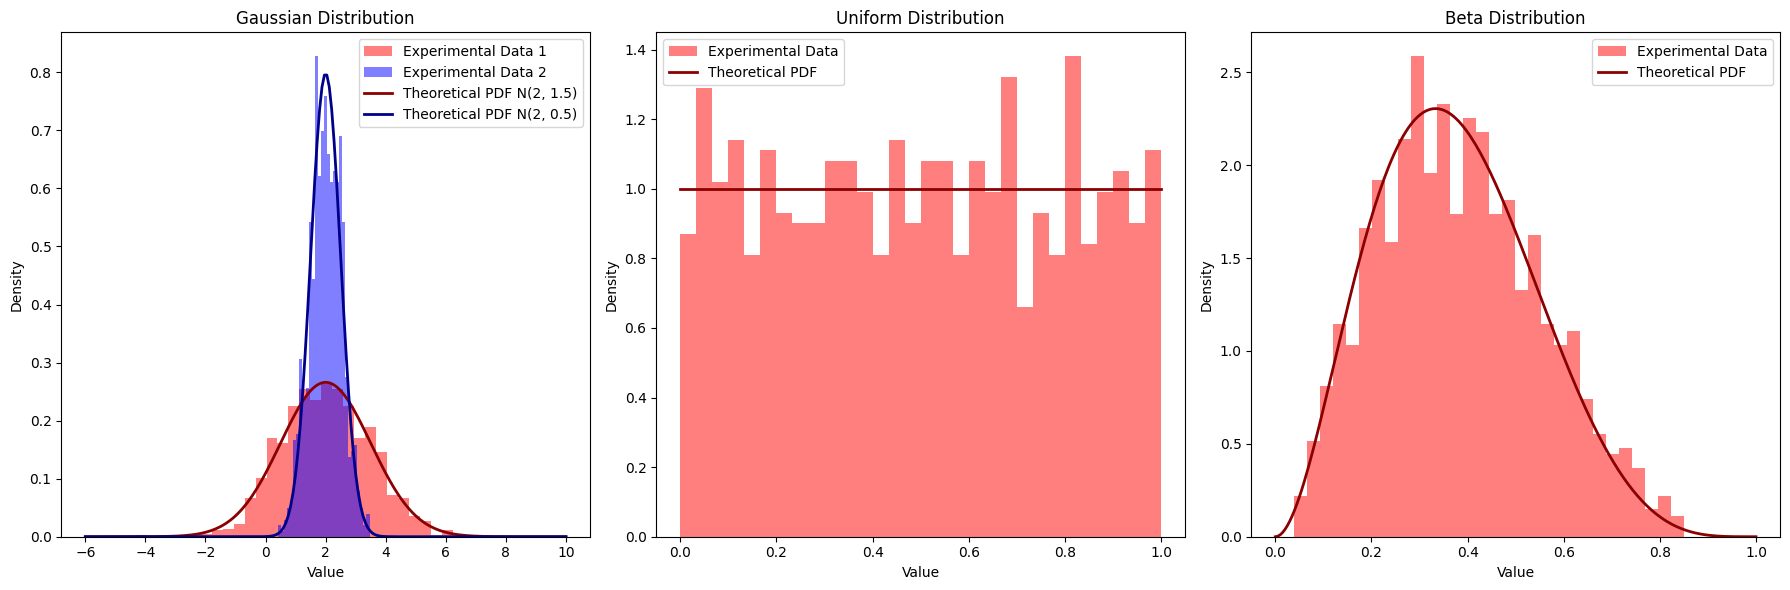

In [184]:
x_gaussian = np.linspace(-6, 10, 200)
x_uniform = np.linspace(a_uniform, b_uniform, 200)
x_beta = np.linspace(0, 1, 200)

# --- Plotting ---
plt.figure(figsize=(18, 6), dpi=100)

# --- Gaussian Histogram & PDF ---
plt.subplot(1, 3, 1)
plt.hist(data_gaussian_1, bins=30, density=True, alpha=0.5, color='red', label='Experimental Data 1')
plt.hist(data_gaussian_2, bins=30, density=True, alpha=0.5, color='blue', label='Experimental Data 2')
plt.plot(x_gaussian, norm.pdf(x_gaussian, mu_gaussian_1, sigma_gaussian_1), color='darkred', lw=2, label=f'Theoretical PDF N({mu_gaussian_1}, {sigma_gaussian_1})')
plt.plot(x_gaussian, norm.pdf(x_gaussian, mu_gaussian_2, sigma_gaussian_2), color='darkblue', lw=2, label=f'Theoretical PDF N({mu_gaussian_2}, {sigma_gaussian_2})')
plt.title("Gaussian Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# --- Uniform Histogram & PDF ---
plt.subplot(1, 3, 2)
plt.hist(data_uniform, bins=30, density=True, alpha=0.5, color='red', label='Experimental Data')
plt.plot(x_uniform, uniform.pdf(x_uniform, a_uniform, b_uniform-a_uniform), color='darkred', lw=2, label='Theoretical PDF')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# --- Beta Histogram & PDF ---
plt.subplot(1, 3, 3)
plt.hist(data_beta, bins=30, density=True, alpha=0.5, color='red', label='Experimental Data')
plt.plot(x_beta, beta.pdf(x_beta, alpha_beta, beta_beta), color='darkred', lw=2, label='Theoretical PDF')
plt.title("Beta Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


We can see that, with the number of samples chosen arbitrarily, the histograms provide a reasonable representation of the theoretical PDFs. However, to quantify how well the experimental data matches the theory, we will calculate the error bars.

# Problem 1: Error Bars 

First, we are going to study the number of data necessaty to have a low error bar. In the following table, you can see the theorical values that we have to use to study this problem

| Distribution | Parameters | Mean ($\mu$) | Variance ($\sigma^2$) |
|-------------|------------|----------------|----------------------|
| Gaussian (Normal) | $\mu, \sigma$ | $\mu$ | $\sigma^2$ |
| Uniform | $a, b$ | $\frac{a+b}{2}$ | $\frac{(b-a)^2}{12}$ |
| Beta | $\alpha, \beta$ | $\frac{\alpha}{\alpha+\beta}$ | $\frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}$ |


In the following cell, we determine those theoretical values.

In [185]:
# Teorical means and variances
mean_gaussian_teo_1=mu_gaussian_1
var_gaussian_teo_1=sigma_gaussian_1**2

mean_gaussian_teo_2=mu_gaussian_2
var_gaussian_teo_2=sigma_gaussian_2**2

mean_uniform_teo=(a_uniform+b_uniform)/2.0
var_uniform_teo=(b_uniform-a_uniform)**2/12.0

mean_beta_teo=alpha_beta/(alpha_beta+beta_beta)
var_beta_teo=alpha_beta*beta_beta/((alpha_beta+beta_beta+1.0)*(alpha_beta+beta_beta)**2)

# Create a formatted table
print(f"{'Distribution':<10} | {'Theoretical Mean':>17} | {'Theoretical Var':>17} ")
print("-"*70)
print(f"{'Gaussian 1'} |  {mean_gaussian_teo_1:17.4f} | {var_gaussian_teo_1:17.4f} ")
print(f"{'Gaussian 2'} |  {mean_gaussian_teo_2:17.4f} | {var_gaussian_teo_2:17.4f}")
print(f"{'Uniform'}    |  {mean_uniform_teo:17.4f} | {var_uniform_teo:17.4f} ")
print(f"{'Beta'}       |  {mean_beta_teo:17.4f} | {var_beta_teo:17.4f} ")



Distribution |  Theoretical Mean |   Theoretical Var 
----------------------------------------------------------------------
Gaussian 1 |             2.0000 |            2.2500 
Gaussian 2 |             2.0000 |            0.2500
Uniform    |             0.5000 |            0.0833 
Beta       |             0.3750 |            0.0260 


In order to determinate de error bars for the emperical data, we're going to use two inequalities:

## 1. Hoeffding Inequality

For a set of independent random variables $X_1, X_2, ..., X_N$ bounded in $[a, b]$, the probability that the empirical mean $\bar{X}$ deviates from the expected value $\mathbb{E}[\bar{X}]$ by more than $\epsilon$ is bounded by:

$$
P(|\bar{X} - \mathbb{E}[\bar{X}]| \ge \epsilon) \le 2 \exp\Bigg(-\frac{2 N \epsilon^2}{(b-a)^2}\Bigg)
$$

The error bar (maximum deviation $\epsilon$) with confidence $1-\delta$ is:

$$
\epsilon_{\text{Hoeffding}} \le \sqrt{\frac{(b-a)^2 \ln(2/\delta)}{2 N}}
$$

In our case, we will choose the values of 𝑎 and 𝑏 as the minimum and maximum values of the generated data.


## 2. Chebyshev Inequality

For a random variable with mean $\mu$ and variance $\sigma^2$, the probability that the sample mean $\bar{X}$ deviates from the true mean by more than $\epsilon$ is bounded by:

$$
P(|\bar{X} - \mu| \ge \epsilon) \le \frac{\sigma^2}{N \epsilon^2}
$$

The error bar (maximum deviation $\epsilon$) with confidence $1-\delta$ is:
$$
\epsilon_{\text{Chebyshev}} \le \sqrt{\frac{\sigma^2}{N \delta}}
$$
This inequality is better to be applied when $\sigma$ is small or it's known.

In that way, if we know $\epsilon$  we can say that:
$$
\bar{X}-\epsilon \le \mu \le \bar{X} + \epsilon
$$


In the following cells, we define functions to calculate the value of 𝜀. Later, we compute these values for each distribution and summarize them in a table. We have chosen a confidence level of 0.95 (𝛿=0.05).

In [186]:
def hoeffding_errorbar(data, delta=0.05):

    N = len(data)
    a, b = np.min(data), np.max(data) 
    
    eps = np.sqrt(((b - a)**2 * np.log(2/delta)) / (2 * N))
    return eps

def chebyshev_errorbar(data, var, delta=0.05):
    N = len(data)
    eps = np.sqrt(var / (N * delta))
    return eps


In [187]:
# Hoeffding error bars
eps_hoeff_gaussian_1 = hoeffding_errorbar(data_gaussian_1, delta=0.05)
eps_hoeff_gaussian_2 = hoeffding_errorbar(data_gaussian_2, delta=0.05)
eps_hoeff_uniform = hoeffding_errorbar(data_uniform, delta=0.05)
eps_hoeff_beta = hoeffding_errorbar(data_beta, delta=0.05)

# Chebyshev error bars
eps_cheb_gaussian_1 = chebyshev_errorbar(data_gaussian_1,var_gaussian_teo_1, delta=0.05)
eps_cheb_gaussian_2 = chebyshev_errorbar(data_gaussian_2,var_gaussian_teo_2, delta=0.05)
eps_cheb_uniform = chebyshev_errorbar(data_uniform,var_uniform_teo, delta=0.05)
eps_cheb_beta = chebyshev_errorbar(data_beta,var_beta_teo, delta=0.05)

# Print Hoeffding vs Chebyshev error bars in a table
print(f"{'Distribution':<10} | {'Hoeffding Error':>15} | {'Chebyshev Error':>15}")
print("-"*45)
print(f"{'Gaussian 1'}   | {eps_hoeff_gaussian_1:15.4f} | {eps_cheb_gaussian_1:15.4f}")
print(f"{'Gaussian 2'}   | {eps_hoeff_gaussian_2:15.4f} | {eps_cheb_gaussian_2:15.4f}")
print(f"{'Uniform'}      | {eps_hoeff_uniform:15.4f} | {eps_cheb_uniform:15.4f}")
print(f"{'Beta'}         | {eps_hoeff_beta:15.4f} | {eps_cheb_beta:15.4f}")


Distribution | Hoeffding Error | Chebyshev Error
---------------------------------------------
Gaussian 1   |          0.4696 |          0.2121
Gaussian 2   |          0.1308 |          0.0707
Uniform      |          0.0429 |          0.0408
Beta         |          0.0349 |          0.0228


We observe that $\epsilon$, which is simply the difference between the empirical and theoretical values, can sometimes be quite large. Therefore, we will fix $\epsilon$ and determine the required data length in order to obtain better results. We can see that this error depends on the variance: for the first Gaussian distribution, with variance greater than one, we observe more dispersion.



Solving for $N$ to achieve a confidence level of $1-\delta$ for the hoeffding Inequality:

$$
N \le \frac{(b-a)^2 \ln(2/\delta)}{2 \epsilon^2}
$$


For the Chebyshev Inequality:

$$
N \le \frac{\sigma^2}{\delta \epsilon^2}
$$



We define the following functions to determine the length of the data:

In [188]:
def hoeffding_get_N(data, epsilon=0.01, delta=0.05):
    a, b = np.min(data), np.max(data)
    N = ((b - a)**2 * np.log(2/delta)) / (2 * epsilon**2)
    return int(np.ceil(N))

def chebyshev_get_N(var, epsilon=0.01, delta=0.05):
    N = var / (delta * epsilon**2)
    return int(np.ceil(N))

We will choose a small value for $\epsilon$=0.01 and a confidence level $\delta$=0.05, and then estimate the required data length $N$.


In [189]:
# Epsilon and delta
epsilon = 0.01
delta = 0.05

# Estimate N using Hoeffding
N_hoeff_gaussian_1 = hoeffding_get_N(data_gaussian_1, epsilon, delta)
N_hoeff_gaussian_2 = hoeffding_get_N(data_gaussian_2, epsilon, delta)
N_hoeff_uniform = hoeffding_get_N(data_uniform, epsilon, delta)
N_hoeff_beta = hoeffding_get_N(data_beta, epsilon, delta)

# Estimate N using Chebyshev
N_cheb_gaussian_1 = chebyshev_get_N(var_gaussian_teo_1, epsilon, delta)
N_cheb_gaussian_2 = chebyshev_get_N(var_gaussian_teo_2, epsilon, delta)
N_cheb_uniform = chebyshev_get_N(var_uniform_teo, epsilon, delta)
N_cheb_beta = chebyshev_get_N(var_beta_teo, epsilon, delta)


print(f"{'Distribution':<10} | {'Hoeffding N':>15} | {'Chebyshev N':>15}")
print("-"*45)
print(f"{'Gaussian 1'}   | {N_hoeff_gaussian_1:15.0f} | {N_cheb_gaussian_1:15.0f}")
print(f"{'Gaussian 2'}   | {N_hoeff_gaussian_2:15.0f} | {N_cheb_gaussian_2:15.0f}")
print(f"{'Uniform'}      | {N_hoeff_uniform:15.0f} | {N_cheb_uniform:15.0f}")
print(f"{'Beta'}         | {N_hoeff_beta:15.0f} | {N_cheb_beta:15.0f}")

Distribution |     Hoeffding N |     Chebyshev N
---------------------------------------------
Gaussian 1   |         2205159 |          450000
Gaussian 2   |          171065 |           50000
Uniform      |           18435 |           16667
Beta         |           12166 |            5209


Now that we have determined the required data length, we can see that the Hoeffding bound is larger than the Chebyshev bound. We can infer that Hoeffding overestimates the number $N$, since it depends on the upper and lower bounds $a$ and $b$, which in our case we set as the maximum and minimum data values. Therefore, we will use the Chebyshev bound and verify whether it holds or not.  Moreover, for each distribution we know the theoretical value of the variance, and as we argued before, it is preferable to use this inequality in this case. 

It should be noted that the number of samples 𝑁 required is much larger than the initial value proposed, which was 𝑁=1000.


Once we know the amount of data needed to achieve small error bars, we will generate new data and compare the theoretical and empirical values.



# Problem 2 : Theoretical Values of Mean and Variance

To compare the experimental and theoretical values, we compute the relative error:

$$
e_{\text{rel}}(\%) =
\left| 
\frac{ \text{value}_{\text{exp}} - \text{value}_{\text{teo}} }
     { \text{value}_{\text{teo}} }
\right|
\cdot 100
$$

Also, we use $\epsilon=\text{abs}(\mu-\bar{X})$. Based on the previous problem, we can choose a new data length in order to obtain a lower error bar.

In [190]:
# Using the estimated N to generate new datasets

N_data_gaussian_1 = N_cheb_gaussian_1
N_data_gaussian_2 = N_cheb_gaussian_2
N_data_uniform = N_cheb_uniform
N_data_beta = N_cheb_beta

# Generate new datasets with the estimated N

data_gaussian_1 =np.random.normal(mu_gaussian_1, sigma_gaussian_1, N_data_gaussian_1)
data_gaussian_2 =np.random.normal(mu_gaussian_2, sigma_gaussian_2, N_data_gaussian_2)
data_uniform = np.random.uniform(low=a_uniform, high=b_uniform, size=N_data_uniform)
data_beta = np.random.beta(alpha_beta, beta_beta, N_data_beta)

# Empirical means and variances
mean_gaussian_emp_1 = np.mean(data_gaussian_1)
var_gaussian_emp_1 = np.var(data_gaussian_1) 

mean_gaussian_emp_2 = np.mean(data_gaussian_2)
var_gaussian_emp_2 = np.var(data_gaussian_2) 

mean_uniform_emp  = np.mean(data_uniform)
var_uniform_emp  = np.var(data_uniform)

mean_beta_emp     = np.mean(data_beta)
var_beta_emp     = np.var(data_beta)

# Relative error calculation
rel_error_mean_gaussian_1 = abs(mean_gaussian_emp_1 - mean_gaussian_teo_1) / mean_gaussian_teo_1 * 100
rel_error_var_gaussian_1  = abs(var_gaussian_emp_1 - var_gaussian_teo_1) / var_gaussian_teo_1 * 100
epsilon_error_gaussian_1 = abs(mean_gaussian_emp_1 - mean_gaussian_teo_1)

rel_error_mean_gaussian_2 = abs(mean_gaussian_emp_2 - mean_gaussian_teo_2) / mean_gaussian_teo_2 * 100
rel_error_var_gaussian_2  = abs(var_gaussian_emp_2 - var_gaussian_teo_2) / var_gaussian_teo_2 * 100
epsilon_error_gaussian_2 = abs(mean_gaussian_emp_2 - mean_gaussian_teo_2)

rel_error_mean_uniform = abs(mean_uniform_emp - mean_uniform_teo) / mean_uniform_teo * 100
rel_error_var_uniform  = abs(var_uniform_emp - var_uniform_teo) / var_uniform_teo * 100
epsilon_error_uniform = abs(mean_uniform_emp - mean_uniform_teo)

rel_error_mean_beta = abs(mean_beta_emp - mean_beta_teo) / mean_beta_teo * 100
rel_error_var_beta  = abs(var_beta_emp - var_beta_teo) / var_beta_teo * 100
epsilon_error_beta = abs(mean_beta_emp - mean_beta_teo)

# Create a formatted table for mean
print(f"{'Distribution':<10} | {'Empirical Mean':>15} | {'Theoretical Mean':>17} | {'Rel. Error (%)':>15} | {'Epsilon Error':>15}")
print("-"*90)
print(f"{'Gaussian 1'} | {mean_gaussian_emp_1:15.4f} | {mean_gaussian_teo_1:17.4f} | {rel_error_mean_gaussian_1:15.4f} | {epsilon_error_gaussian_1:15.4f}")
print(f"{'Gaussian 2'} | {mean_gaussian_emp_2:15.4f} | {mean_gaussian_teo_2:17.4f} | {rel_error_mean_gaussian_2:15.4f} | {epsilon_error_gaussian_2:15.4f}")
print(f"{'Uniform'}    | {mean_uniform_emp:15.4f} | {mean_uniform_teo:17.4f} | {rel_error_mean_uniform:15.4f} | {epsilon_error_uniform:15.4f}")
print(f"{'Beta'}       | {mean_beta_emp:15.4f} | {mean_beta_teo:17.4f} | {rel_error_mean_beta:15.4f} | {epsilon_error_beta:15.4f}")

print("\n")

# Create a formatted table for variances   
print(f"{'Distribution':<10} | {'Empirical Var':>15} | {'Theoretical Var':>17} | {'Rel. Error (%)':>15} ")
print("-"*70)
print(f"{'Gaussian 1'} | {var_gaussian_emp_1:15.4f} | {var_gaussian_teo_1:17.4f} | {rel_error_var_gaussian_1:15.4f} ")
print(f"{'Gaussian 2'} | {var_gaussian_emp_2:15.4f} | {var_gaussian_teo_2:17.4f} | {rel_error_var_gaussian_2:15.4f} ")
print(f"{'Uniform'}    | {var_uniform_emp:15.4f} | {var_uniform_teo:17.4f} | {rel_error_var_uniform:15.4f} ")
print(f"{'Beta'}       | {var_beta_emp:15.4f} | {var_beta_teo:17.4f} | {rel_error_var_beta:15.4f} ")

Distribution |  Empirical Mean |  Theoretical Mean |  Rel. Error (%) |   Epsilon Error
------------------------------------------------------------------------------------------
Gaussian 1 |          2.0004 |            2.0000 |          0.0198 |          0.0004
Gaussian 2 |          1.9992 |            2.0000 |          0.0417 |          0.0008
Uniform    |          0.5008 |            0.5000 |          0.1579 |          0.0008
Beta       |          0.3749 |            0.3750 |          0.0240 |          0.0001


Distribution |   Empirical Var |   Theoretical Var |  Rel. Error (%) 
----------------------------------------------------------------------
Gaussian 1 |          2.2476 |            2.2500 |          0.1079 
Gaussian 2 |          0.2518 |            0.2500 |          0.7378 
Uniform    |          0.0833 |            0.0833 |          0.0377 
Beta       |          0.0262 |            0.0260 |          0.5224 


We can observe that the relative error of the mean is less than or equal to one, and the $\epsilon$ error (first table, last column) is below 0.01, which matches the selected threshold. This is expected, as this value represents the upper bound with a 95% confidence level. By selecting the data length according to the Chebyshev bound, we can see that it is sufficient. Furthermore, the empirical and theoretical variances are in close agreement.

We are going to generate a large amount of data and study the probability  $P(|X - \mu| > \varepsilon).$ To do this, we generate multiple datasets and compute the quantity $|X - \mu|$ 
for each of them. With these values, we can empirically estimate the probability that $|X - \mu| > \varepsilon.$


In [191]:
Nsamples=10000

data_epsilon_gaussian_1 = []
data_epsilon_gaussian_2 = []
data_epsilon_uniform = []
data_epsilon_beta = []

for i in range(Nsamples):
    # Generate new datasets
    data_gaussian_1_loop =np.random.normal(mu_gaussian_1, sigma_gaussian_1, N_data_gaussian_1)
    data_gaussian_2_loop =np.random.normal(mu_gaussian_2, sigma_gaussian_2, N_data_gaussian_2)
    data_uniform_loop = np.random.uniform(low=a_uniform, high=b_uniform, size=N_data_uniform)
    data_beta_loop = np.random.beta(alpha_beta, beta_beta, N_data_beta)

    # Calculate empirical means
    mean_gaussian_emp_1_loop = np.mean(data_gaussian_1_loop)
    mean_gaussian_emp_2_loop = np.mean(data_gaussian_2_loop)
    mean_uniform_emp_loop  = np.mean(data_uniform_loop)
    mean_beta_emp_loop     = np.mean(data_beta_loop)

    # Calculate epsilon errors
    epsilon_error_gaussian_1_loop = abs(mean_gaussian_emp_1_loop - mean_gaussian_teo_1)
    epsilon_error_gaussian_2_loop = abs(mean_gaussian_emp_2_loop - mean_gaussian_teo_2)
    epsilon_error_uniform_loop = abs(mean_uniform_emp_loop - mean_uniform_teo)
    epsilon_error_beta_loop = abs(mean_beta_emp_loop - mean_beta_teo)

    # Store epsilon errors
    data_epsilon_gaussian_1.append(epsilon_error_gaussian_1_loop)
    data_epsilon_gaussian_2.append(epsilon_error_gaussian_2_loop)
    data_epsilon_uniform.append(epsilon_error_uniform_loop)
    data_epsilon_beta.append(epsilon_error_beta_loop)


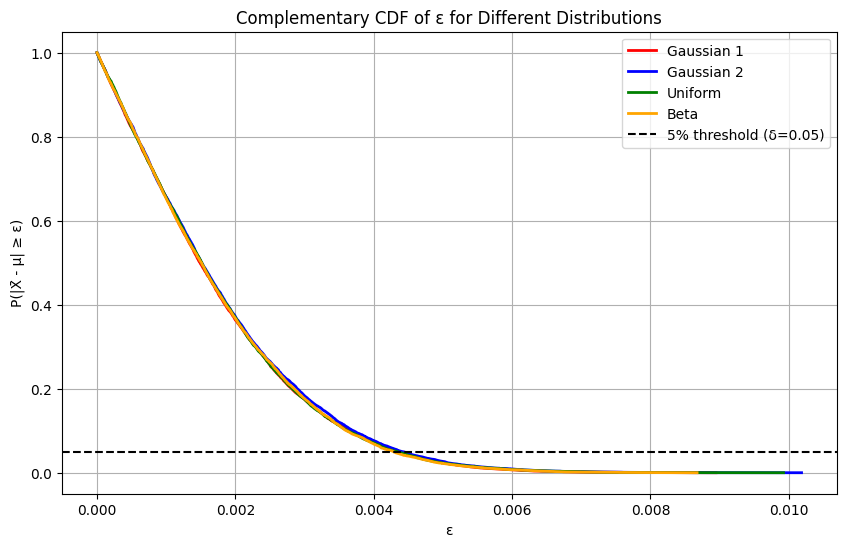

In [192]:
def plot_complementary_cdf(data_epsilon, label, color):
    data_sorted = np.sort(data_epsilon)
    P_eps = 1 - np.arange(1, len(data_sorted)+1)/len(data_sorted)  # P(ε ≥ ε)
    plt.plot(data_sorted, P_eps, lw=2, color=color, label=label)

plt.figure(figsize=(10,6))

plot_complementary_cdf(data_epsilon_gaussian_1, "Gaussian 1", "red")
plot_complementary_cdf(data_epsilon_gaussian_2, "Gaussian 2", "blue")
plot_complementary_cdf(data_epsilon_uniform, "Uniform", "green")
plot_complementary_cdf(data_epsilon_beta, "Beta", "orange")

plt.axhline(0.05, color='black', linestyle='--', label='5% threshold (δ=0.05)')

plt.xlabel("ε")
plt.ylabel("P(|X̄ - μ| ≥ ε)")
plt.title("Complementary CDF of ε for Different Distributions")
plt.legend()
plt.grid(True)
plt.show()

We can see that for $\varepsilon = 0.005$ we obtain  $P(|X - \mu| > \varepsilon) < 0.05$, which shows that the inequality is very conservative (ve have selected $\varepsilon = 0.01$) but still fulfills its purpose: it guarantees that the probability does not exceed the desired bound.


## Problem 3: Checking the 68–95–99.7 Rule

In this part, we investigate which distributions satisfy the **68–95–99.7 rule**.

We study the fraction of the data that lies within the following intervals:

- $\mu \pm \sigma$
- $\mu \pm 2\sigma$
- $\mu \pm 3\sigma$

and compare it with the theoretical percentages:

- 68% of the data within $\mu \pm \sigma$
- 95% of the data within $\mu \pm 2\sigma$
- 99.7% of the data within $\mu \pm 3\sigma$


In [193]:
distributions = {
    "Gaussian 1": data_gaussian_1,
    "Gaussian 2": data_gaussian_2,
    "Uniform": data_uniform,
    "Beta": data_beta
}

print(f"{'Distribution':<10} | {'1σ (%)':<8} | {'2σ (%)':<8} | {'3σ (%)':<8}")
print("-"*40)

for name, data in distributions.items():
    mu = np.mean(data)
    sigma = np.std(data)
    
    frac_1sigma = np.mean((data >= mu - sigma) & (data <= mu + sigma)) * 100
    frac_2sigma = np.mean((data >= mu - 2*sigma) & (data <= mu + 2*sigma)) * 100
    frac_3sigma = np.mean((data >= mu - 3*sigma) & (data <= mu + 3*sigma)) * 100
    
    print(f"{name:<10} | {frac_1sigma:>7.2f} | {frac_2sigma:>7.2f} | {frac_3sigma:>7.2f}")


Distribution | 1σ (%)   | 2σ (%)   | 3σ (%)  
----------------------------------------
Gaussian 1 |   68.22 |   95.45 |   99.74
Gaussian 2 |   68.42 |   95.47 |   99.72
Uniform    |   57.43 |  100.00 |  100.00
Beta       |   65.64 |   96.68 |   99.92


From the results, we can see that only the Gaussian (normal) distribution approximately satisfies the 68–95–99.7 rule. The Uniform and Beta distributions do not follow this empirical rule. The case of the Beta distribution may satisfy this rule only if its shape is sufficiently similar to a Gaussian.